# Práctica 5

Contenidos: Series de potencias y series de Fourier.

Bibliografía:  https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

              J. M. Stewart, Python for scientists. Cambridge University Press.

## Series de potencias

Con el comando de Sympy sy.series podemos calcular el desarrollo en serie de 
potencias de una función. Veamos algunos ejemplos. Antes cargaremos los módulos
que necesitaremos.

In [15]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from scipy.integrate import simpson

In [16]:
x = sy.symbols('x')
funcion1 = sy.exp(sy.sin(x))
funcion1

exp(sin(x))

In [17]:
x = sy.symbols('x')
f1 = sy.fps(sy.exp(x))
f2 = sy.fps(sy.sin(x))

In [18]:
f1

FormalPowerSeries(exp(x), x, 0, 1, (SeqFormula(Piecewise((1/factorial(_k), Eq(Mod(_k, 1), 0)), (0, True)), (_k, 1, oo)), SeqFormula(x**_k, (_k, 0, oo)), 1))

In [19]:
f2

FormalPowerSeries(sin(x), x, 0, 1, (SeqFormula(Piecewise(((-1/4)**(_k/2 - 1/2)/(RisingFactorial(3/2, _k/2 - 1/2)*factorial(_k/2 - 1/2)), Eq(Mod(_k, 2), 1)), (0, True)), (_k, 2, oo)), SeqFormula(x**_k, (_k, 0, oo)), x))

In [20]:
f1.truncate(n=8)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040 + O(x**8)

Para componer funciones disponemos del comando compose.

In [21]:
f1.compose(f2,x).truncate()

1 + x + x**2/2 - x**4/8 - x**5/15 + O(x**6)

## Series de Fourier

Podemos utilizar diferentes recursos para trabajar con series de Fourier con 
Python. Una opción es definir nuestras propias funciones. 

Recuerda:
$$f(x)=\frac{A_0}{2}+\sum_{n=1}^\infty A_n\, \cos(nx)+B_n\,\sin(nx).$$
Siendo
$$A_n=\frac{1}{\pi}\int_{-\pi}^{\pi} f(x) \cos(nx)\,dx,$$
$$B_n=\frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\sin(nx)\,dx.$$


In [22]:
def my_fourier_coef(f,n):
    x = np.linspace(-np.pi, np.pi, 1001)
    y1 = f(x)*np.cos(n*x)
    y2 = f(x)*np.sin(n*x)
    return([1/np.pi*simpson(y1,x), 1/np.pi*simpson(y2,x)])

In [23]:
def f(x):
    return(np.sin(np.exp(x)))

In [24]:
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 1000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0*np.ones(len(x))/2
    for n in range (1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
    plt.figure(figsize= (10,6))
    plt.plot(x, f(x), label = 'analítica')
    plt.plot(x,y, label = 'aproximación')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}-ésimo aproximación de Fourier')
    plt.show()



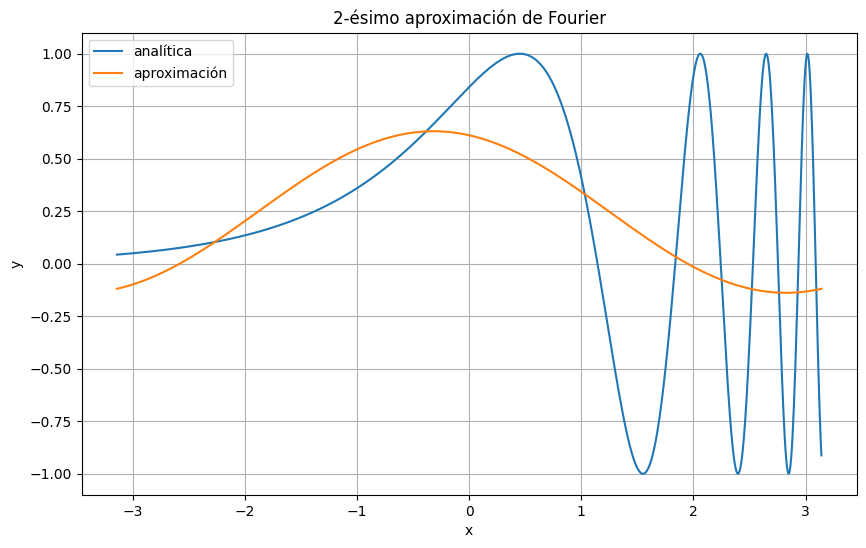

In [25]:

plot_results(f, 2)

Si aumentamos el orden de la serie:

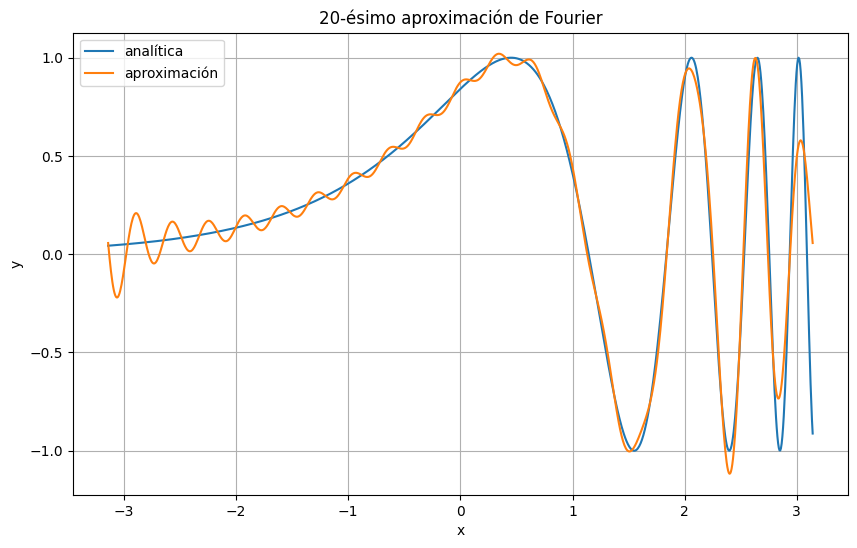

In [26]:
plot_results(f,20)

Veamos otros ejemplos

In [27]:
f = lambda x: np.mod(x, np.pi/2)

Utiliza la función anterior y representa su aproximación de Fourier de orden 5 y
orden 20. Repite el procedimiento con la función:

In [28]:
f2 = lambda x: (x > -np.pi/2) & (x < np.pi/2)

TypeError: Cannot convert expression to float

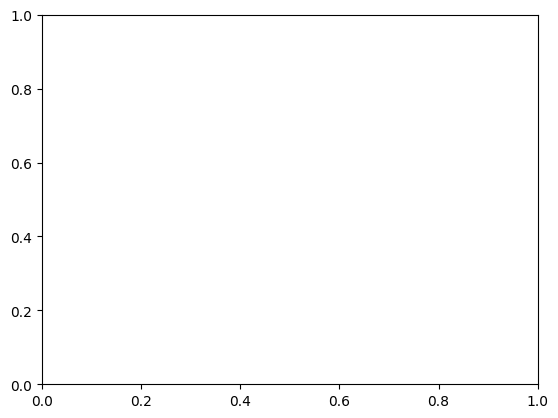

In [29]:
plt.plot(x,f2(x))

La otra posibilidad nos la proporciona Sympy que nos ofrece la opción de 
calcular directamente con el comando que ofrece la serie de Fourier.
Veamos un ejemplo

In [30]:
x = sy.symbols('x')
serie1 = sy.fourier_series(x**2, (x, -sy.pi, sy.pi))

In [31]:
serie1

FourierSeries(x**2, (x, -pi, pi), (pi**2/3, SeqFormula(Piecewise((2*pi**2*sin(_n*pi)/_n + 4*pi*cos(_n*pi)/_n**2 - 4*sin(_n*pi)/_n**3, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (2*pi**3/3, True))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula(0, (_k, 1, oo))))

In [32]:
serie1.truncate()

-4*cos(x) + cos(2*x) + pi**2/3

In [33]:
serie2 =sy.fourier_series(sy.sin(sy.exp(x)),(x,-sy.pi,sy.pi))

In [34]:
serie2.truncate(n=2)

sin(x)*Integral(sin(x)*sin(exp(x)), (x, -pi, pi))/pi + cos(x)*Integral(sin(exp(x))*cos(x), (x, -pi, pi))/pi + Integral(sin(exp(x)), (x, -pi, pi))/(2*pi)